In [1]:
import pandas as pd
import numpy as np

In [2]:
ratings = pd.read_csv('../data/ratings.csv')
anime = pd.read_csv('../data/animes_data.csv')

In [3]:
ratings.head()

,user_id,anime_id,rating
0,1,454,3
1,1,28761,8
2,1,6682,5
3,1,9624,6
4,1,38101,7


In [13]:
# ratingsの基本統計量の確認
round(ratings.describe(),2)

,user_id,anime_id,rating
count,11039694.00,11039694.00,11039694.00
mean,53947.93,14596.26,6.34
std,31949.00,12770.52,3.33
min,1.00,1.00,0.00
25%,25425.00,2476.00,6.00
50%,54846.00,10897.00,7.00
75%,81792.00,25429.00,9.00
max,108024.00,48672.00,10.00


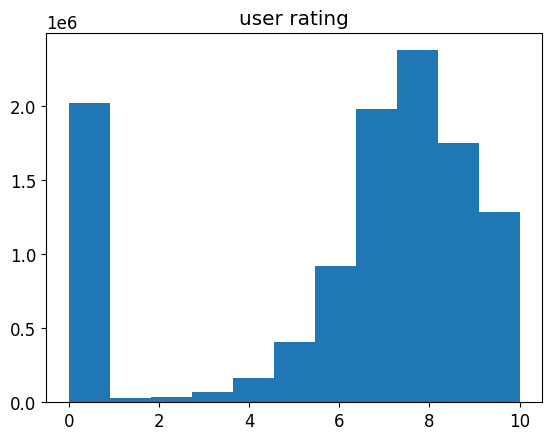

In [12]:
import numpy as np
import matplotlib.pyplot as plt

rate = ratings["rating"].tolist()

plt.rcParams["font.size"] =12
plt.hist(rate, bins=11)
plt.title("user rating")

In [79]:
ratings = pd.read_csv('../data/ratings.csv')
myanime = [16498, 1735, 24405, 31240, 14719]
#10点評価にして、評価データ加える(id=0にすることで重複を避ける)
myratings = pd.DataFrame([{'user_id': 0, 'anime_id': anime_id, 'rating': 10} for anime_id in myanime])
ratings = pd.concat([ratings, myratings])

In [78]:
anime[anime['ja_title'].str.contains("ジョジョ")]

,anime_id,title,main_picture,ja_title,synopsis,genres,media,episodes,rating,members,start_date,season,source,studios
458,665,JoJo no Kimyou na Bouken: Adventure,https://api-cdn.myanimelist.net/images/anime/8...,ジョジョの奇妙な冒険 ADVENTURE,"Kujo Jotaro is a normal, popular Japanese hig...","Adventure,Drama,Fantasy,Horror,Shounen,Superna...",ova,7,7.21,78052,2000-05-25,spring_2000,manga,APPP
459,666,JoJo no Kimyou na Bouken,https://api-cdn.myanimelist.net/images/anime/1...,ジョジョの奇妙な冒険,"Kujo Jotaro is a normal, popular Japanese high...","Adventure,Drama,Fantasy,Horror,Shounen,Superna...",ova,6,7.44,120482,1993-11-19,fall_1993,manga,APPP
1189,3603,JoJo no Kimyou na Bouken: Phantom Blood,https://api-cdn.myanimelist.net/images/anime/5...,ジョジョの奇妙な冒険 ファントム ブラッド,An adaptation of the original five volume arc ...,"Action,Adventure,Horror,Shounen,Vampire",movie,1,7.71,66219,2007-02-17,winter_2007,manga,APPP
2195,14719,JoJo no Kimyou na Bouken (TV),https://cdn.myanimelist.net/images/anime/3/404...,ジョジョの奇妙な冒険,The year is 1868; English nobleman George Joes...,"Action,Adventure,Shounen,Supernatural,Vampire",tv,26,7.89,1564592,2012-10-06,fall_2012,manga,David Production
2542,20899,JoJo no Kimyou na Bouken Part 3: Stardust Crus...,https://api-cdn.myanimelist.net/images/anime/1...,ジョジョの奇妙な冒険 スターダストクルセイダース,Years after an ancient evil was salvaged from ...,"Action,Adventure,Shounen,Supernatural",tv,24,8.10,1142084,2014-04-05,spring_2014,manga,David Production
2819,26055,JoJo no Kimyou na Bouken Part 3: Stardust Crus...,https://cdn.myanimelist.net/images/anime/11/75...,ジョジョの奇妙な冒険 スターダストクルセイダース エジプト編,Joutarou Kuujou and his allies have finally ma...,"Action,Adventure,Shounen,Supernatural",tv,24,8.44,1043743,2015-01-10,winter_2015,manga,David Production
3171,31933,JoJo no Kimyou na Bouken Part 4: Diamond wa Ku...,https://cdn.myanimelist.net/images/anime/3/791...,ジョジョの奇妙な冒険 ダイヤモンドは砕けない,"The year is 1999. Morioh, a normally quiet and...","Action,Adventure,Shounen,Supernatural",tv,39,8.50,1050479,2016-04-02,spring_2016,manga,David Production
4012,37991,JoJo no Kimyou na Bouken Part 5: Ougon no Kaze,https://cdn.myanimelist.net/images/anime/1572/...,ジョジョの奇妙な冒険 黄金の風,"In the coastal city of Naples, corruption is t...","Action,Adventure,Organized Crime,Shounen,Super...",tv,39,8.58,952500,2018-10-06,fall_2018,manga,David Production
4159,38972,JoJo no Kimyou na Bouken Part 5: Ougon no Kaze...,https://cdn.myanimelist.net/images/anime/1398/...,ジョジョの奇妙な冒険 黄金の風 Recaps,Recaps of the JoJo no Kimyou na Bouken: Ougon ...,"Action,Adventure,Shounen",special,3,7.12,45131,2019-01-05,winter_2019,manga,David Production
4704,48661,JoJo no Kimyou na Bouken Part 6: Stone Ocean,https://cdn.myanimelist.net/images/anime/1896/...,ジョジョの奇妙な冒険 ストーンオーシャン,Conspiring forces frame Jolyne Kuujou for a re...,"Action,Adventure,Shounen,Supernatural",ona,12,8.19,445434,2021-12-01,fall_2021,manga,David Production


In [80]:
from scipy.sparse import csr_matrix

matrix_data = csr_matrix((ratings['rating'], (ratings['user_id'], ratings['anime_id'])))

In [81]:
from sklearn.decomposition import NMF

latent = 50
nmf = NMF(n_components=latent)
# ユーザ因子行列
W = nmf.fit_transform(matrix_data)
# アイテム因子行列
H = nmf.components_

In [82]:
WH = np.dot(W, H)

In [83]:
top30 = np.argsort(WH[0])[::-1][:30]
top10 = list(set(top30) - set(myanime))[:10]
anime[anime['anime_id'].isin(top10)]

,anime_id,title,main_picture,ja_title,synopsis,genres,media,episodes,rating,members,start_date,season,source,studios
9,20,Naruto,https://api-cdn.myanimelist.net/images/anime/1...,ナルト,"Moments prior to Naruto Uzumaki's birth, a hug...","Action,Adventure,Fantasy,Martial Arts,Shounen",tv,220,7.98,2706317,2002-10-03,fall_2002,manga,Pierrot
2435,18679,Kill la Kill,https://cdn.myanimelist.net/images/anime/1464/...,キルラキル,"After the murder of her father, Ryuuko Matoi h...","Action,Comedy,Ecchi,School,Super Power",tv,24,8.04,1653797,2013-10-04,fall_2013,original,Trigger
2517,20507,Noragami,https://cdn.myanimelist.net/images/anime/1886/...,ノラガミ,"In times of need, if you look in the right pla...","Action,Fantasy,Mythology,Shounen",tv,12,7.95,2072202,2014-01-05,winter_2014,manga,Bones
2542,20899,JoJo no Kimyou na Bouken Part 3: Stardust Crus...,https://api-cdn.myanimelist.net/images/anime/1...,ジョジョの奇妙な冒険 スターダストクルセイダース,Years after an ancient evil was salvaged from ...,"Action,Adventure,Shounen,Supernatural",tv,24,8.10,1142084,2014-04-05,spring_2014,manga,David Production
2640,22535,Kiseijuu: Sei no Kakuritsu,https://cdn.myanimelist.net/images/anime/3/731...,寄生獣 セイの格率,"All of a sudden, they arrived: parasitic alien...","Action,Gore,Horror,Psychological,Sci-Fi,Seinen",tv,24,8.34,1774828,2014-10-09,fall_2014,manga,Madhouse
2819,26055,JoJo no Kimyou na Bouken Part 3: Stardust Crus...,https://cdn.myanimelist.net/images/anime/11/75...,ジョジョの奇妙な冒険 スターダストクルセイダース エジプト編,Joutarou Kuujou and his allies have finally ma...,"Action,Adventure,Shounen,Supernatural",tv,24,8.44,1043743,2015-01-10,winter_2015,manga,David Production
2970,30276,One Punch Man,https://cdn.myanimelist.net/images/anime/12/76...,ワンパンマン,The seemingly unimpressive Saitama has a rathe...,"Action,Adult Cast,Comedy,Parody,Seinen,Super P...",tv,12,8.50,3046140,2015-10-05,fall_2015,web_manga,Madhouse
3174,31964,Boku no Hero Academia,https://cdn.myanimelist.net/images/anime/10/78...,僕のヒーローアカデミア,"The appearance of ""quirks,"" newly discovered s...","Action,School,Shounen,Super Power",tv,13,7.89,2871192,2016-04-03,spring_2016,manga,Bones
3385,33486,Boku no Hero Academia 2nd Season,https://cdn.myanimelist.net/images/anime/12/85...,僕のヒーローアカデミア,"At UA Academy, not even a violent attack can d...","Action,School,Shounen,Super Power",tv,25,8.11,2401873,2017-04-01,spring_2017,manga,Bones
3922,37510,Mob Psycho 100 II,https://cdn.myanimelist.net/images/anime/1918/...,モブサイコ100 II,"Shigeo ""Mob"" Kageyama is now maturing and unde...","Action,Comedy,Super Power,Supernatural",tv,13,8.80,1424775,2019-01-07,winter_2019,web_manga,Bones


In [84]:
anime[anime['anime_id'].isin(myanime)]

,anime_id,title,main_picture,ja_title,synopsis,genres,media,episodes,rating,members,start_date,season,source,studios
883,1735,Naruto: Shippuuden,https://api-cdn.myanimelist.net/images/anime/1...,-ナルト- 疾風伝,It has been two and a half years since Naruto ...,"Action,Adventure,Fantasy,Martial Arts,Shounen",tv,500,8.26,2338415,2007-02-15,winter_2007,manga,Pierrot
2195,14719,JoJo no Kimyou na Bouken (TV),https://cdn.myanimelist.net/images/anime/3/404...,ジョジョの奇妙な冒険,The year is 1868; English nobleman George Joes...,"Action,Adventure,Shounen,Supernatural,Vampire",tv,26,7.89,1564592,2012-10-06,fall_2012,manga,David Production
2318,16498,Shingeki no Kyojin,https://cdn.myanimelist.net/images/anime/10/47...,進撃の巨人,"Centuries ago, mankind was slaughtered to near...","Action,Award Winning,Drama,Gore,Military,Shoun...",tv,25,8.54,3729377,2013-04-07,spring_2013,manga,Wit Studio
2738,24405,World Trigger,https://cdn.myanimelist.net/images/anime/1783/...,ワールドトリガー,When a gate to another world suddenly opens on...,"Action,Sci-Fi,Shounen",tv,73,7.58,399647,2014-10-05,fall_2014,manga,Toei Animation
3066,31240,Re:Zero kara Hajimeru Isekai Seikatsu,https://cdn.myanimelist.net/images/anime/1522/...,Re：ゼロから始める異世界生活,When Subaru Natsuki leaves the convenience sto...,"Drama,Fantasy,Isekai,Psychological,Suspense,Ti...",tv,25,8.24,2083501,2016-04-04,spring_2016,light_novel,White Fox
